# Predicting the predictions

RTE provides an API to access the predictions of the productions of the different types of energy sources.

The API is available at the following URL: https://data.rte-france.com/catalog/-/api/generation/Generation-Forecast/v2.1



In [26]:
import pandas as pd
from energy_forecast import ROOT_DIR
from energy_forecast.production_forecast import ProductionForecastAPI

env_file = ROOT_DIR / ".env"
sun_flux_file = ROOT_DIR / "data" / "silver" / "group_mean_sun.csv"
wind_speed_file = ROOT_DIR / "data" / "silver" / "group_means_wind.csv"

with env_file.open("r") as f:
    secret = f.readline().strip().split("=", 1)[1]

## First : reading the Weather Data

This step requires the two files in the Data folder.

In [27]:
data_sun = pd.read_csv(sun_flux_file, index_col=0)
data_sun["time"] = pd.to_datetime(data_sun["time"])
data_sun["step"] = pd.to_timedelta(data_sun["step"])
data_sun["valid_time"] = (
    data_sun["time"] + data_sun["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_sun["step"] >= pd.Timedelta("1D")) & (
    data_sun["step"] < pd.Timedelta("2D")
)
data_sunD1 = data_sun.loc[mask_D1]
data_sunD1_regions = data_sunD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="ssrd"
)
data_sunD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data_wind = pd.read_csv(wind_speed_file, index_col=False)
data_wind["time"] = pd.to_datetime(data_wind["time"])
data_wind["step"] = pd.to_timedelta(data_wind["step"])
data_wind["valid_time"] = (
    data_wind["time"] + data_wind["step"]
)  # re-forcing the type to datetime

mask_D1 = (data_wind["step"] >= pd.Timedelta("1D")) & (
    data_wind["step"] < pd.Timedelta("2D")
)
data_windD1 = data_wind.loc[mask_D1]
data_windD1_regions = data_windD1.set_index("valid_time").pivot_table(
    index="valid_time", columns="region", values="si10"
)
data_windD1_regions.head()

region,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France
valid_time,,,,,,,,,,,,,
2022-02-02 00:00:00,3.705175,4.568276,3.618184,5.089186,2.738070,5.581255,7.098129,6.486237,3.067982,5.653931,4.084127,6.189727,5.536256
2022-02-02 01:00:00,3.642379,4.467238,3.637520,4.925655,3.236441,5.360667,6.929116,6.696957,2.970035,5.337131,4.211257,6.436513,5.553952
2022-02-02 02:00:00,3.565388,4.325107,3.703880,4.928397,3.292210,5.261508,6.651305,6.627742,2.861727,5.112169,4.206979,6.645758,5.340007
2022-02-02 03:00:00,3.477547,4.289974,3.734176,4.882295,2.995472,5.266212,6.441283,6.488635,2.668218,5.075777,4.100137,6.682411,5.293652
2022-02-02 04:00:00,3.476616,4.251610,3.752356,4.757608,2.792265,5.068052,6.376684,6.372849,2.510890,5.077017,3.887392,6.527510,5.267478


<Axes: >

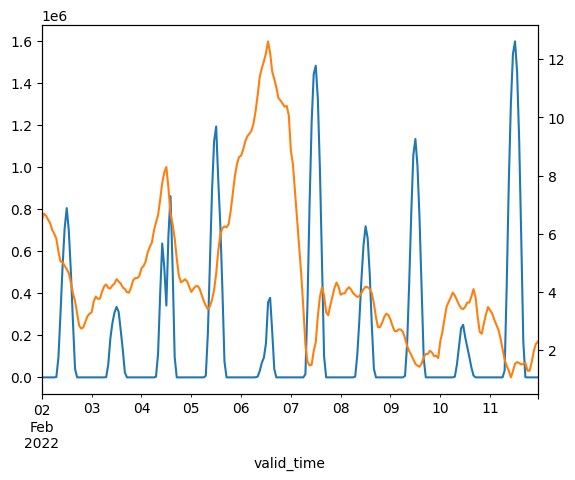

In [34]:
data_sunD1_regions["Normandie"].iloc[0:240].plot()

data_windD1_regions["Normandie"].iloc[0:240].plot(secondary_y=True)

## Accessing the prediction of the production

RTE provides the prevision at D+1 of the production of the different types of energy sources.

In [43]:
prod_for_client = ProductionForecastAPI(secret)
data_solar = prod_for_client.get_raw_data(
    production_type="SOLAR",
    type="D-1",
    start_date=data_sunD1_regions.index[0],
    end_date=data_sunD1_regions.index[-1],
)

The duration of the forecast cannot be more than 21 days. Fixing the end date.


In [45]:
prediction_solar = data_solar["forecasts"][0]
prediction_solar = pd.DataFrame(prediction_solar["values"]).set_index("start_date")[
    "value"
]

<Axes: xlabel='start_date'>

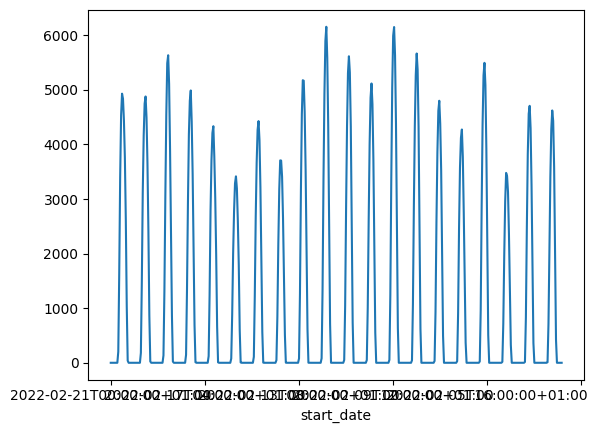

In [47]:
prediction_solar.plot()

2022-02-02 01:00:00+01:00
2022-02-10 23:00:00+01:00


/tmp/ipykernel_1488682/2538352297.py:24: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  prediction_solar = pd.concat([prediction_solar, prediction_solar_tmp])


<Axes: >

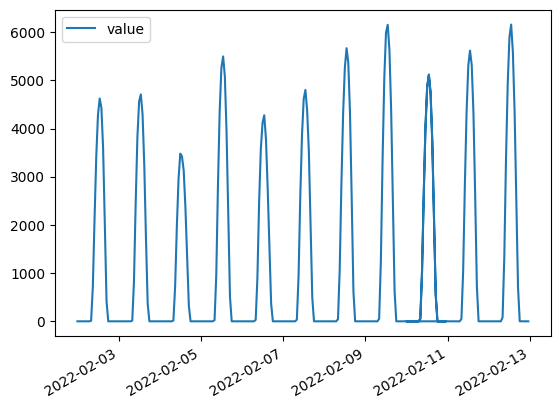

In [153]:
number_of_days = 10
start_date = data_sunD1_regions.index[0]
try:
    start_date = start_date.tz_localize("Europe/Paris")
except:
    pass
max_duration_call = 20
last_date = start_date + pd.Timedelta(f"{number_of_days}D")

prediction_solar = pd.DataFrame()

while start_date < last_date:
    print(start_date)
    end_date = start_date + pd.Timedelta(f"{number_of_days}D")
    if end_date > last_date:
        end_date = last_date + pd.Timedelta("2D")
    data_solar = prod_for_client.get_raw_data(
        production_type="SOLAR", type="D-1", start_date=start_date, end_date=end_date
    )
    prediction_solar_dict = data_solar["forecasts"][0]
    prediction_solar_tmp = pd.DataFrame(prediction_solar_dict["values"]).set_index(
        "start_date"
    )["value"]
    prediction_solar_tmp.index = pd.to_datetime(prediction_solar_tmp.index)
    prediction_solar_tmp = prediction_solar_tmp.sort_index()

    prediction_solar = pd.concat([prediction_solar, prediction_solar_tmp])
    start_date = prediction_solar.index[-1]

prediction_solar.plot()

# modeling

In [155]:
try:
    data_sunD1_regions.index = data_sunD1_regions.index.tz_localize("UTC").tz_convert(
        "Europe/Paris"
    )
except:
    data_sunD1_regions.index = data_sunD1_regions.index.tz_convert("Europe/Paris")
    pass
try:
    prediction_solar.index = prediction_solar.index.tz_localize("Europe/Paris")
except:
    prediction_solar.index = prediction_solar.index.tz_convert("Europe/Paris")

X = data_sunD1_regions.loc[prediction_solar.index[0] : prediction_solar.index[-1]]

In [156]:
X_mean = X.mean(axis=1)

X_mean, prediction_solar_aligned = X_mean.align(prediction_solar, join="inner")

data_joined = pd.concat([X_mean, prediction_solar_aligned], axis=1)

<Axes: xlabel='valid_time'>

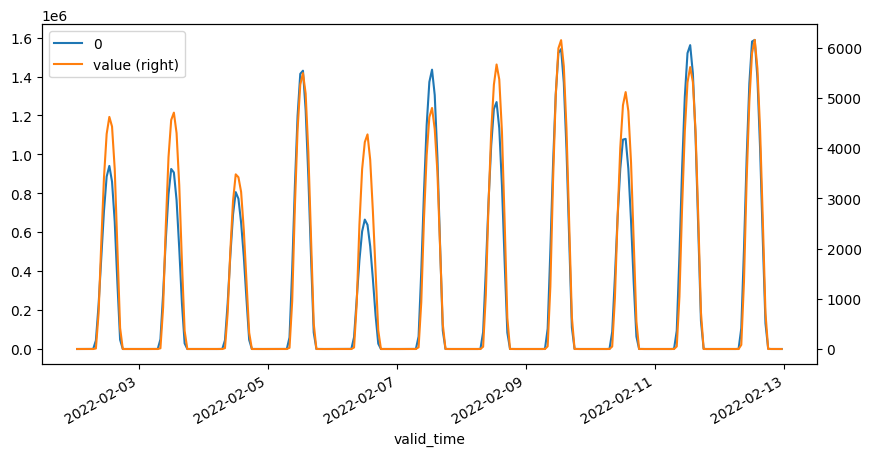

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
data_joined.plot(ax=ax, secondary_y="value")

In [159]:
from sklearn.linear_model import LinearRegression

In [161]:
Xs_cols = X.columns
Y_col = prediction_solar.columns[0]
joined_data = pd.concat([X, prediction_solar_aligned], axis=1)
joined_data = joined_data[joined_data[Y_col].notna()]
joined_data

,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France,value
valid_time,,,,,,,,,,,,,,
2022-02-02 01:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-02 05:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-12 19:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-12 20:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-12 21:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
model = LinearRegression(positive=True, fit_intercept=False)
model.fit(joined_data[Xs_cols], joined_data[Y_col])

LinearRegression(fit_intercept=False, positive=True)

In [163]:
Ypred = model.predict(joined_data[Xs_cols])

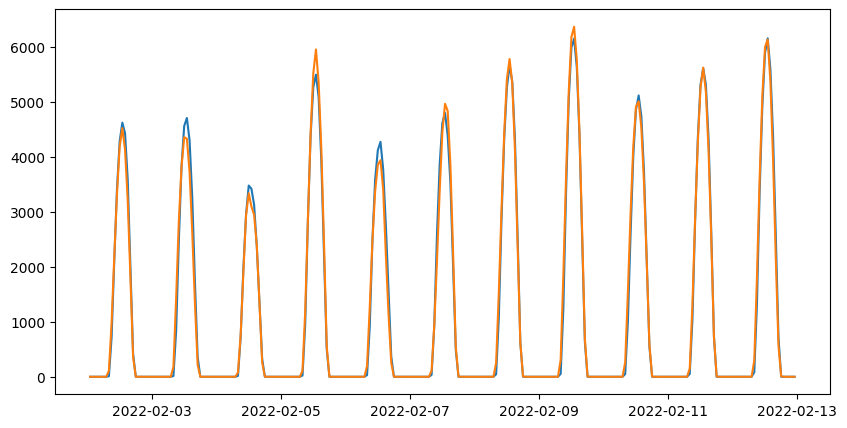

In [164]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(joined_data[Y_col])
ax.plot(joined_data.index, Ypred)

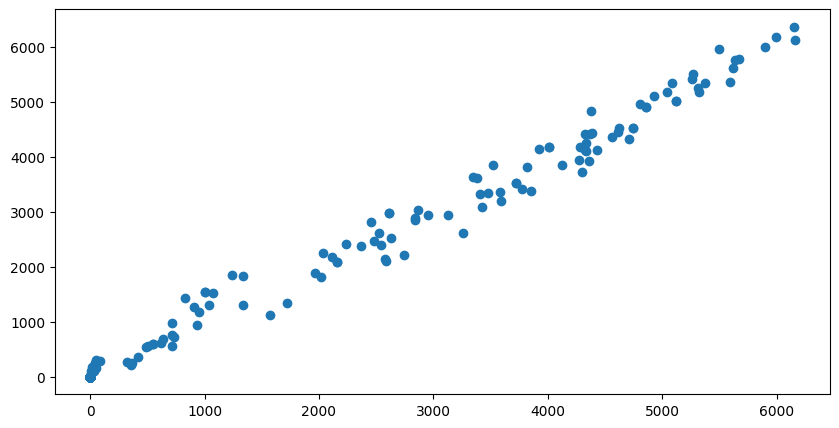

In [165]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(joined_data[Y_col], Ypred)

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(joined_data[Y_col], Ypred), r2_score(joined_data[Y_col], Ypred)

(np.float64(27151.20360589134), 0.9921685103521398)

# Conclusion

We can see that, using the historical weather data, we can predict the prediction of the production of the different solar energy source.

## TODO
- [ ] the same for wind energy
- [ ] Run on longer periods
- [ ] observe the evolution with time
